<a href="https://colab.research.google.com/github/RobDBennett/DS-Unit-1-Build/blob/master/SteamDataShaping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Research Question:
##How do people spend their time on Steam?
Often times I see a game advertised (usually on a sale, or friends have hyped up), and I'll buy it. And then stop playing it almost immediately in favor of an 'old classic'. How many people share this tendency?

For me personally, this is a trend that I noticed long ago and I've tried to curb it but it's tricky. There is just something satifying about buying a new game, and yet I find that I play my 'old favorites' far more than these new experiences. Wanting to understand if this is a known part of the business model of Steam or just a quirk I had, I looked for a some data on the subject.

In [1]:
import pandas as pd
import numpy as np
from google.colab import files
uploaded = files.upload()
column_headers= ['id','game','purchase','hours','0']


Saving steam-200k.csv to steam-200k.csv


In [2]:
games = pd.read_csv('steam-200k.csv', header=None,names=column_headers)
print(games.shape)
games.head()

(200000, 5)


,id,game,purchase,hours,0
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
1,151603712,The Elder Scrolls V Skyrim,play,273.0,0
2,151603712,Fallout 4,purchase,1.0,0
3,151603712,Fallout 4,play,87.0,0
4,151603712,Spore,purchase,1.0,0


In [0]:
games = games.drop(['0'], axis=1)

In [4]:
uploaded= files.upload()

Saving steam.csv to steam.csv


In [5]:
steam = pd.read_csv('steam.csv')
print(steam.shape)
steam.head()

(27075, 18)


,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [6]:
steam = steam.drop(['english','developer','publisher','platforms','required_age',
                    'categories','steamspy_tags','achievements','owners',
                    'appid','average_playtime'],axis=1)
steam.head()

,name,release_date,genres,positive_ratings,negative_ratings,median_playtime,price
0,Counter-Strike,2000-11-01,Action,124534,3339,317,7.19
1,Team Fortress Classic,1999-04-01,Action,3318,633,62,3.99
2,Day of Defeat,2003-05-01,Action,3416,398,34,3.99
3,Deathmatch Classic,2001-06-01,Action,1273,267,184,3.99
4,Half-Life: Opposing Force,1999-11-01,Action,5250,288,415,3.99


In [7]:
steam = steam.rename(columns={'name':'game','release_date':'release','genres':'genre','positive_ratings':'pos_rate','negative_ratings':'neg_rate','median_playtime':'med_play','price':'price'})
steam.head()

,game,release,genre,pos_rate,neg_rate,med_play,price
0,Counter-Strike,2000-11-01,Action,124534,3339,317,7.19
1,Team Fortress Classic,1999-04-01,Action,3318,633,62,3.99
2,Day of Defeat,2003-05-01,Action,3416,398,34,3.99
3,Deathmatch Classic,2001-06-01,Action,1273,267,184,3.99
4,Half-Life: Opposing Force,1999-11-01,Action,5250,288,415,3.99


In [8]:
total = pd.merge(games, steam, on='game',how='inner')
total.head()

,id,game,purchase,hours,release,genre,pos_rate,neg_rate,med_play,price
0,151603712,Fallout 4,purchase,1.0,2015-11-09,RPG,110376,45377,2904,19.99
1,151603712,Fallout 4,play,87.0,2015-11-09,RPG,110376,45377,2904,19.99
2,87445402,Fallout 4,purchase,1.0,2015-11-09,RPG,110376,45377,2904,19.99
3,87445402,Fallout 4,play,83.0,2015-11-09,RPG,110376,45377,2904,19.99
4,25096601,Fallout 4,purchase,1.0,2015-11-09,RPG,110376,45377,2904,19.99


In [9]:
total.dtypes

id            int64
game         object
purchase     object
hours       float64
release      object
genre        object
pos_rate      int64
neg_rate      int64
med_play      int64
price       float64
dtype: object

In [10]:
total.shape

(92883, 10)

In [0]:
test = total.replace('purchase', np.nan)

In [12]:
test = test.dropna()
test

,id,game,purchase,hours,release,genre,pos_rate,neg_rate,med_play,price
1,151603712,Fallout 4,play,87.0,2015-11-09,RPG,110376,45377,2904,19.99
3,87445402,Fallout 4,play,83.0,2015-11-09,RPG,110376,45377,2904,19.99
5,25096601,Fallout 4,play,1.6,2015-11-09,RPG,110376,45377,2904,19.99
7,211925330,Fallout 4,play,133.0,2015-11-09,RPG,110376,45377,2904,19.99
9,115396529,Fallout 4,play,17.9,2015-11-09,RPG,110376,45377,2904,19.99
...,...,...,...,...,...,...,...,...,...,...
92873,112739159,Ride! Carnival Tycoon,play,0.3,2008-07-29,Simulation,15,26,0,4.99
92875,116564064,SAMURAI WARRIORS 4-II,play,2.2,2015-09-29,Action,757,215,0,39.99
92877,116564064,The Bug Butcher,play,0.3,2016-01-19,Action;Indie,939,92,67,5.59
92880,135400225,Life is Hard,play,3.1,2015-11-03,Adventure;Indie;Simulation;Strategy;Early Access,339,132,340,5.99


This is pretty exciting now that I've shaped this a bit. The important data that I am left with is the user, the game title, if they purchased it (which now that I've used the purchase column to pull out the 1.0 values from the hours for games they purchased, I don't really need this column anymore at all), the release date, genre, some of the ratings, the median playtime for the average user, and the price of the game in question. I'm pretty pleased with how this game out.
I should note that the original dataset had 200k rows, and now I'm down to 36k, which is still enough to run some interesting thought models, but I know that we lost many rows that didn't have titles that my other steam data had. Just something to bear in mind.


In [0]:
test.to_csv ('steamproject.csv')

In other notebooks I might pull up this file directly, but that's the file of my more or less completed dataframe. Lets do some visualizations with it.

In [14]:
test['game'].value_counts().head(10)

Dota 2             4841
Team Fortress 2    2323
Unturned           1069
Left 4 Dead 2       801
Garry's Mod         666
Counter-Strike      568
Terraria            460
Portal 2            453
Warframe            424
Portal              417
Name: game, dtype: int64

In [15]:
dota = test.loc[test['game'] == 'Dota 2']
dota['hours'].mean()

202.78549886387088

In [16]:
tf2 = test.loc[test['game'] == 'Team Fortress 2']
tf2['hours'].mean()

74.76250538097285

In [17]:
unturn = test.loc[test['game'] == 'Unturned']
unturn['hours'].mean()

15.057436856875599

In [18]:
l4d2 = test.loc[test['game'] == 'Left 4 Dead 2']
l4d2['hours'].mean()

41.943445692883884

In [19]:
garry = test.loc[test['game'] == "Garry's Mod"]
garry['hours'].mean()

74.66261261261265

In [20]:
counter = test.loc[test['game'] == 'Counter-Strike']
counter['hours'].mean()

236.37517605633803

In [21]:
terr = test.loc[test['game'] == 'Terraria']
terr['hours'].mean()

65.11260869565214

In [22]:
portal2 = test.loc[test['game'] == 'Portal 2']
portal2['hours'].mean()

20.126048565121405

In [23]:
warframe = test.loc[test['game'] == 'Warframe']
warframe['hours'].mean()

63.85518867924527

In [24]:
portal = test.loc[test['game'] == 'Portal']
portal['hours'].mean()

5.474340527577937

In [0]:
data = {'game': ['Dota 2', 'Team Fortress 2', 'Unturned', 'Left 4 Dead 2',
                 "Garry's Mod",'Counter-Strike','Terraria','Portal 2',
                 'Warframe','Portal'],
        'players': [4841, 2323, 1069, 801, 666, 568, 460, 453, 424, 417],
        'mean': [202.79, 74.76, 15.06, 41.94, 76.66,236.38,65.11,20.13,63.86,5.47]}
vis_top_10 = pd.DataFrame(data, columns=['game','players','mean'])


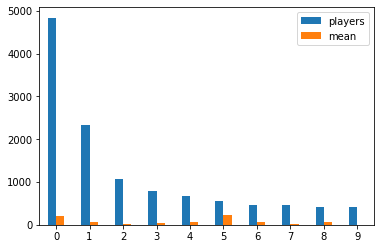

In [26]:
ax = vis_top_10.plot.bar(rot=0)

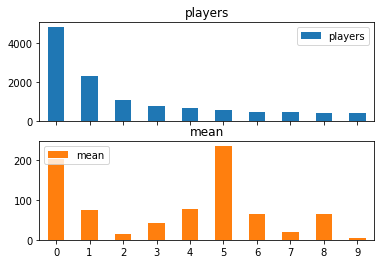

In [27]:
axes = vis_top_10.plot.bar(rot=0, subplots=True)
axes[1].legend(loc=2)

In [28]:
comp10 = pd.merge(vis_top_10, test.drop(['id','purchase','hours'], axis=1), 
                  on='game',how='left')
comp10 = comp10.drop_duplicates()
comp10

,game,players,mean,release,genre,pos_rate,neg_rate,med_play,price
0,Dota 2,4841,202.79,2013-07-09,Action;Free to Play;Strategy,863507,142079,801,0.00
4841,Team Fortress 2,2323,74.76,2007-10-10,Action;Free to Play,515879,34036,623,0.00
7164,Unturned,1069,15.06,2017-07-07,Action;Adventure;Casual;Free to Play;Indie,292574,31482,413,0.00
8233,Left 4 Dead 2,801,41.94,2009-11-19,Action,251789,8418,566,7.19
9034,Garry's Mod,666,76.66,2006-11-29,Indie;Simulation,363721,16433,1875,6.99
9700,Counter-Strike,568,236.38,2000-11-01,Action,124534,3339,317,7.19
10268,Terraria,460,65.11,2011-05-16,Action;Adventure;Indie;RPG,255600,7797,1840,6.99
10728,Portal 2,453,20.13,2011-04-18,Action;Adventure,138220,1891,520,7.19
11181,Warframe,424,63.86,2013-03-25,Action;Free to Play,226541,20268,394,0.00
11605,Portal,417,5.47,2007-10-10,Action,51801,1080,137,7.19


In [0]:
comp10.to_csv('comp_top10_played')

I am pretty sure that there are easier ways to do this, but this wasn't too bad.

So, the the above is for the top 10 most played games, but it doesn't count for anything that was 'purchased'. So lets run more or less the same process only this time let's just look for the 'purchased' columns. 

In [30]:
bought = total.loc[total['purchase'] == 'purchase']
bought.head()

,id,game,purchase,hours,release,genre,pos_rate,neg_rate,med_play,price
0,151603712,Fallout 4,purchase,1.0,2015-11-09,RPG,110376,45377,2904,19.99
2,87445402,Fallout 4,purchase,1.0,2015-11-09,RPG,110376,45377,2904,19.99
4,25096601,Fallout 4,purchase,1.0,2015-11-09,RPG,110376,45377,2904,19.99
6,211925330,Fallout 4,purchase,1.0,2015-11-09,RPG,110376,45377,2904,19.99
8,115396529,Fallout 4,purchase,1.0,2015-11-09,RPG,110376,45377,2904,19.99


In [31]:
print(bought.shape)
bought['game'].value_counts().head(10)

(56581, 10)


Dota 2               4841
Team Fortress 2      2323
Unturned             1563
Left 4 Dead 2         951
Counter-Strike        856
Warframe              847
Garry's Mod           731
Robocraft             689
Heroes & Generals     658
Half-Life 2           639
Name: game, dtype: int64

In [32]:
dota.sort_values('hours')

,id,game,purchase,hours,release,genre,pos_rate,neg_rate,med_play,price
10186,142183287,Dota 2,play,0.1,2013-07-09,Action;Free to Play;Strategy,863507,142079,801,0.0
17948,193092714,Dota 2,play,0.1,2013-07-09,Action;Free to Play;Strategy,863507,142079,801,0.0
11964,193012627,Dota 2,play,0.1,2013-07-09,Action;Free to Play;Strategy,863507,142079,801,0.0
10280,242469861,Dota 2,play,0.1,2013-07-09,Action;Free to Play;Strategy,863507,142079,801,0.0
17130,138578560,Dota 2,play,0.1,2013-07-09,Action;Free to Play;Strategy,863507,142079,801,0.0
...,...,...,...,...,...,...,...,...,...,...
15194,86256882,Dota 2,play,6015.0,2013-07-09,Action;Free to Play;Strategy,863507,142079,801,0.0
15842,121199670,Dota 2,play,6753.0,2013-07-09,Action;Free to Play;Strategy,863507,142079,801,0.0
18578,52567955,Dota 2,play,6964.0,2013-07-09,Action;Free to Play;Strategy,863507,142079,801,0.0
17696,130882834,Dota 2,play,7765.0,2013-07-09,Action;Free to Play;Strategy,863507,142079,801,0.0


In [0]:
comp10 = comp10.drop(['med_play'],axis=1)


In [34]:
dota['hours'].median()

5.5

In [35]:
tf2['hours'].median()

4.4

In [36]:
unturn['hours'].median()

3.5

In [37]:
l4d2['hours'].median()

10.5

In [38]:
garry['hours'].median()

17.25

In [39]:
counter['hours'].median()

8.8

In [40]:
terr['hours'].median()

20.35

In [41]:
portal2['hours'].median()

10.8

In [42]:
warframe['hours'].median()

5.85

In [43]:
portal['hours'].median()

3.2

In [44]:
median = [5.5, 4.4, 3.5, 10.5,17.25,8.8,20.35,10.8,5.85,3.2]
comp10['median'] = median
comp10

,game,players,mean,release,genre,pos_rate,neg_rate,price,median
0,Dota 2,4841,202.79,2013-07-09,Action;Free to Play;Strategy,863507,142079,0.00,5.50
4841,Team Fortress 2,2323,74.76,2007-10-10,Action;Free to Play,515879,34036,0.00,4.40
7164,Unturned,1069,15.06,2017-07-07,Action;Adventure;Casual;Free to Play;Indie,292574,31482,0.00,3.50
8233,Left 4 Dead 2,801,41.94,2009-11-19,Action,251789,8418,7.19,10.50
9034,Garry's Mod,666,76.66,2006-11-29,Indie;Simulation,363721,16433,6.99,17.25
9700,Counter-Strike,568,236.38,2000-11-01,Action,124534,3339,7.19,8.80
10268,Terraria,460,65.11,2011-05-16,Action;Adventure;Indie;RPG,255600,7797,6.99,20.35
10728,Portal 2,453,20.13,2011-04-18,Action;Adventure,138220,1891,7.19,10.80
11181,Warframe,424,63.86,2013-03-25,Action;Free to Play,226541,20268,0.00,5.85
11605,Portal,417,5.47,2007-10-10,Action,51801,1080,7.19,3.20


In [0]:
comp10.to_csv('comp_top10_played.csv')

In [46]:
robo = test.loc[test['game'] == 'Robocraft']
robo['hours'].mean()

22.350368550368547

In [47]:
hero = test.loc[test['game'] == 'Heroes & Generals']
hero['hours'].mean()

9.849253731343284

In [48]:
half = test.loc[test['game'] == 'Half-Life 2']
half['hours'].mean()

11.967134831460674

In [0]:
data1 = {'game': ['Dota 2', 'Team Fortress 2', 'Unturned', 'Left 4 Dead 2',
                 "Garry's Mod",'Counter-Strike','Warframe','Robocraft',
                 'Heroes & Generals','Half-Life 2'],
        'purchased': [4841, 2323, 1563, 951, 731, 856, 847,689,658,639],
        'mean': [202.79, 74.76, 15.06, 41.94, 76.66,236.38,63.86,22.35,9.85,11.97],
        'median':[5.5,4.4,3.5,10.5,17.25,8.8,5.85,3.6,1.3,6.6]}
bought_10 = pd.DataFrame(data1, columns=['game','purchased','mean','median'])


In [50]:
robo['hours'].median()

3.6

In [51]:
hero['hours'].median()

1.3

In [52]:
half['hours'].median()

6.6

In [53]:
bought_10 = pd.merge(bought_10, steam, on='game',how='inner')
bought_10.drop('med_play',axis=1)

,game,purchased,mean,median,release,genre,pos_rate,neg_rate,price
0,Dota 2,4841,202.79,5.50,2013-07-09,Action;Free to Play;Strategy,863507,142079,0.00
1,Team Fortress 2,2323,74.76,4.40,2007-10-10,Action;Free to Play,515879,34036,0.00
2,Unturned,1563,15.06,3.50,2017-07-07,Action;Adventure;Casual;Free to Play;Indie,292574,31482,0.00
3,Left 4 Dead 2,951,41.94,10.50,2009-11-19,Action,251789,8418,7.19
4,Garry's Mod,731,76.66,17.25,2006-11-29,Indie;Simulation,363721,16433,6.99
5,Counter-Strike,856,236.38,8.80,2000-11-01,Action,124534,3339,7.19
6,Warframe,847,63.86,5.85,2013-03-25,Action;Free to Play,226541,20268,0.00
7,Robocraft,689,22.35,3.60,2017-08-24,Action;Free to Play;Indie;Massively Multiplaye...,80360,30987,0.00
8,Heroes & Generals,658,9.85,1.30,2016-10-18,Action;Free to Play;Indie;Massively Multiplayer,65856,34416,0.00
9,Half-Life 2,639,11.97,6.60,2004-11-16,Action,67902,2419,7.19


In [54]:
total['price'].value_counts().head(10)

0.00     36730
6.99      9966
7.19      8388
3.99      5009
14.99     4552
19.99     3356
10.99     3049
7.99      2515
9.99      2144
4.99      1092
Name: price, dtype: int64

In [0]:
bought_10.to_csv('bought_10.csv')

In [62]:
steam['price'].value_counts().head(40)

3.99     3211
0.79     2892
0.00     2560
6.99     2050
7.19     1304
1.69     1276
2.09     1040
4.79      847
10.99     843
2.89      793
1.99      774
14.99     758
4.99      717
11.39     612
1.59      586
15.49     520
2.79      476
9.99      433
5.19      430
5.79      401
5.59      345
5.99      265
7.99      226
8.99      206
6.19      206
9.29      180
10.29     169
11.99     148
3.19      143
29.99     141
22.99     133
19.49     127
2.99      123
23.79     118
18.99     115
19.99     105
13.99      89
24.99      88
8.29       85
15.99      83
Name: price, dtype: int64

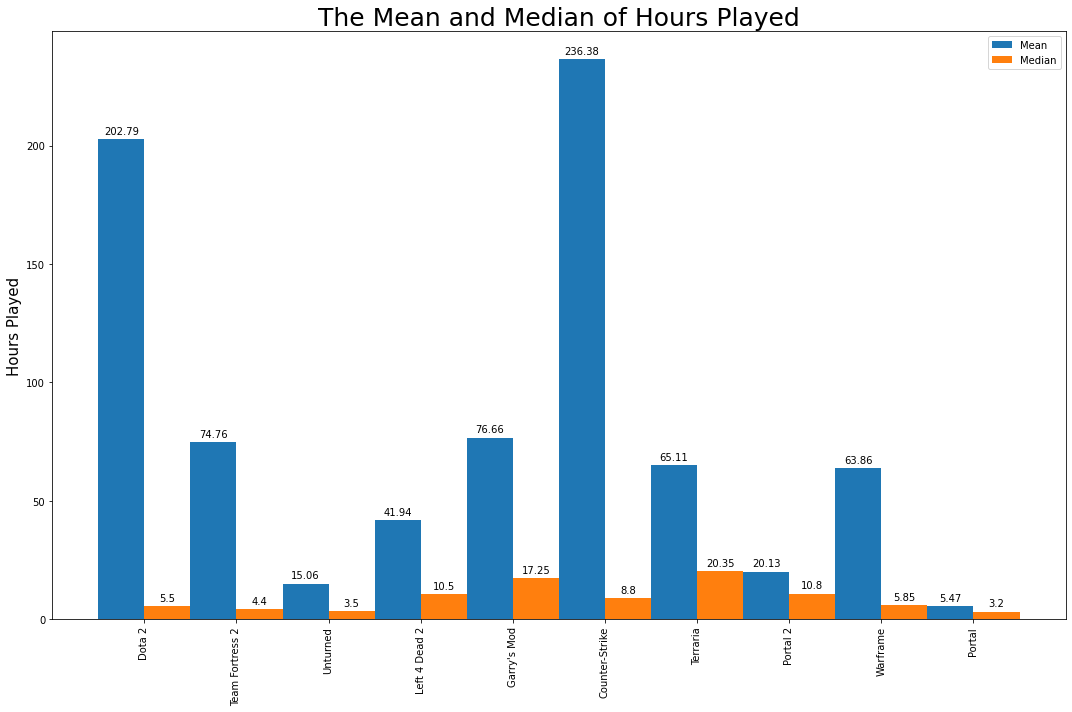

In [64]:
import matplotlib.pyplot as plt

labels = list(comp10['game'])
means = list(comp10['mean'])
median = list(comp10['median'])
x = np.arange(len(labels))
width = 0.5 
fig, ax = plt.subplots(figsize=(15, 10))
rects1 = ax.bar(x - width/2, means, width, label='Mean')
rects2 = ax.bar(x + width/2, median, width, label='Median')
ax.set_ylabel('Hours Played', fontsize=15)
ax.set_title('The Mean and Median of Hours Played', fontsize=25)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation='vertical')
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()

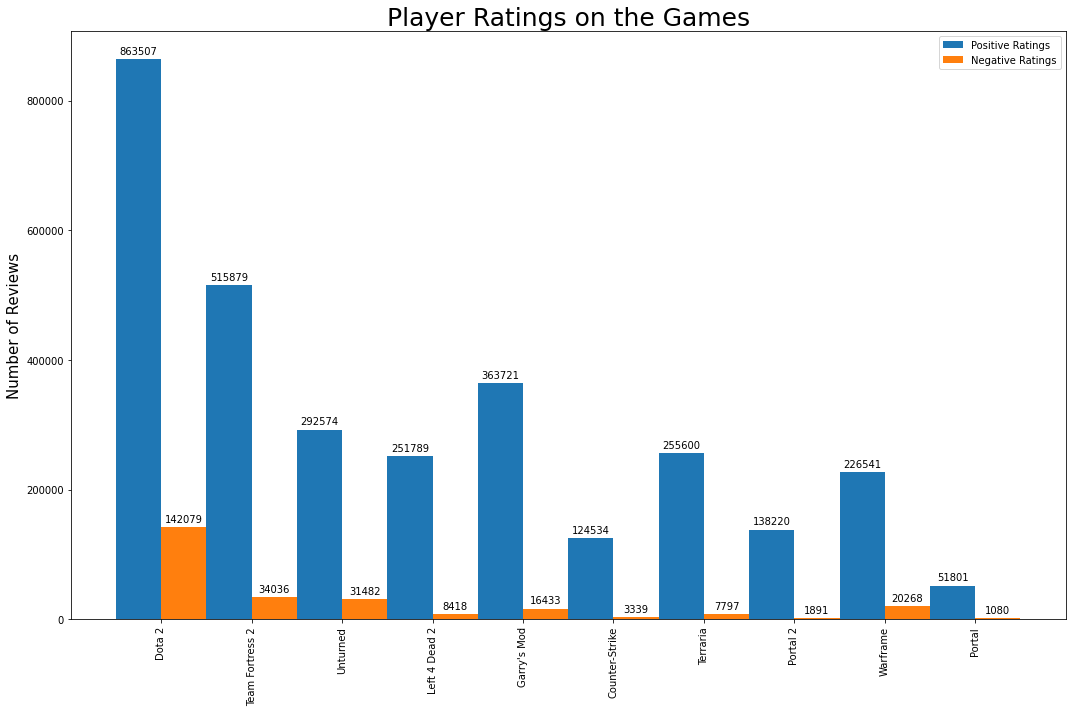

In [65]:
pos = list(comp10['pos_rate'])
neg = list(comp10['neg_rate'])
fig, ax = plt.subplots(figsize=(15, 10))
rects1 = ax.bar(x - width/2, pos, width, label='Positive Ratings')
rects2 = ax.bar(x + width/2, neg, width, label='Negative Ratings')

ax.set_ylabel('Number of Reviews', fontsize=15)
ax.set_title('Player Ratings on the Games', fontsize=25)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation='vertical')
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()

In [0]:
import datetime
date = comp10
date['dates_parsed'] = pd.to_datetime(date['release'], infer_datetime_format=True)
date['year'] = pd.DatetimeIndex(date['dates_parsed']).year
date= date.drop(['release','dates_parsed'], axis=1)

In [68]:
date

,game,players,mean,genre,pos_rate,neg_rate,price,median,year
0,Dota 2,4841,202.79,Action;Free to Play;Strategy,863507,142079,0.00,5.50,2013
4841,Team Fortress 2,2323,74.76,Action;Free to Play,515879,34036,0.00,4.40,2007
7164,Unturned,1069,15.06,Action;Adventure;Casual;Free to Play;Indie,292574,31482,0.00,3.50,2017
8233,Left 4 Dead 2,801,41.94,Action,251789,8418,7.19,10.50,2009
9034,Garry's Mod,666,76.66,Indie;Simulation,363721,16433,6.99,17.25,2006
9700,Counter-Strike,568,236.38,Action,124534,3339,7.19,8.80,2000
10268,Terraria,460,65.11,Action;Adventure;Indie;RPG,255600,7797,6.99,20.35,2011
10728,Portal 2,453,20.13,Action;Adventure,138220,1891,7.19,10.80,2011
11181,Warframe,424,63.86,Action;Free to Play,226541,20268,0.00,5.85,2013
11605,Portal,417,5.47,Action,51801,1080,7.19,3.20,2007
